## **Project Goal**: Analyze keyword dataset. Filter keywords based on specific metrics.

In [40]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [41]:
# load csv file into a dataframe
df = pd.read_csv('/content/near_me_Keyword Stats 2023-05-28 at 01_17_40 - near_me_Keyword Stats 2023-05-28 at 01_17_40.csv')
df.sample(5)

,Keyword,Avg. monthly searches,Competition,Top of page bid (low range),Top of page bid (high range)
716,licensed tax professional near me,50.0,Medium,8.88,22.96
545,punjabi tax accountant near me,50.0,Medium,NaN,NaN
504,tax and immigration services near me,50.0,Medium,NaN,NaN
506,local taxes near me,50.0,Low,NaN,NaN
73,vita taxes near me,50.0,Low,0.48,12.41


In [42]:
df.shape

(868, 5)

### **Explore Data**

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 868 entries, 0 to 867
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Keyword                       868 non-null    object 
 1   Avg. monthly searches         861 non-null    float64
 2   Competition                   868 non-null    object 
 3   Top of page bid (low range)   207 non-null    float64
 4   Top of page bid (high range)  207 non-null    float64
dtypes: float64(3), object(2)
memory usage: 34.0+ KB


In [44]:
# rename columns
df = df.rename(columns={"Top of page bid (low range)": "low bid", "Top of page bid (high range)": "high bid", "Avg. monthly searches": "ams"})
df.head()

,Keyword,ams,Competition,low bid,high bid
0,taxes near me,5000.0,Low,7.56,31.89
1,tax places near me,5000.0,Low,5.49,21.97
2,tax consultant near me,500.0,Low,5.56,26.89
3,tax professional near me,500.0,Low,6.96,32.71
4,tax advisor near me,500.0,Low,7.35,27.70


In [45]:
# inspect for null values
df.isnull().sum()

Keyword          0
ams              7
Competition      0
low bid        661
high bid       661
dtype: int64

In [46]:
# check for data distribution and skewness
df['low bid'].median()

4.76

In [47]:
df['high bid'].median()

21.91

In [48]:
# check for duplicate data
df.duplicated().sum()

0

In [49]:
# drop null from ams column
df.dropna(subset = ['ams'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 861 entries, 0 to 867
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Keyword      861 non-null    object 
 1   ams          861 non-null    float64
 2   Competition  861 non-null    object 
 3   low bid      207 non-null    float64
 4   high bid     207 non-null    float64
dtypes: float64(3), object(2)
memory usage: 40.4+ KB


In [50]:
# inspect descriptive statistics
df.describe()

,ams,low bid,high bid
count,861.000000,207.000000,207.000000
mean,100.813008,5.136860,24.538309
std,450.406058,3.047354,16.671896
min,0.000000,0.170000,0.790000
25%,50.000000,2.940000,14.695000
50%,50.000000,4.760000,21.910000
75%,50.000000,6.775000,28.975000
max,5000.000000,18.210000,134.760000


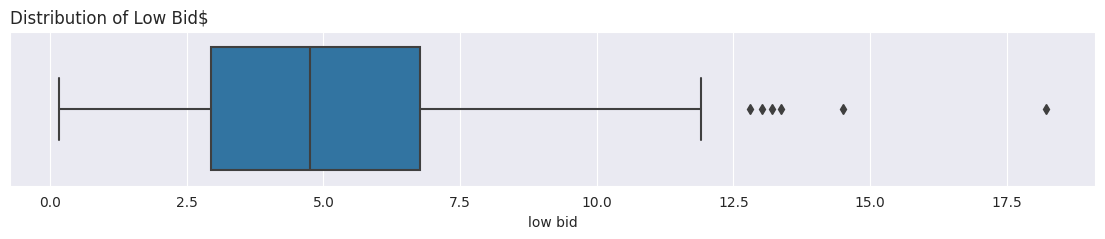

In [51]:
# plot box and whisker plot to inspect data distribution
plt.figure(figsize=(14,2))

sns.boxplot(data=df, x='low bid')

plt.title('Distribution of Low Bid$', loc='left')
plt.show()

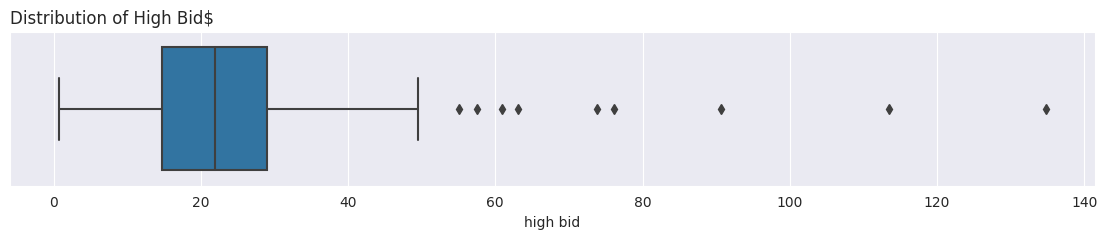

In [52]:
plt.figure(figsize=(14,2))

sns.boxplot(data=df, x='high bid')

plt.title('Distribution of High Bid$', loc='left')
plt.show()

Observation: The data is skewed to the left, not evenly. Replace NAN values with median values instead of mean.

In [53]:
# replace NAN with median values
df['low bid'] = df['low bid'].fillna(df['low bid'].median())

In [54]:
df['high bid'] = df['high bid'].fillna(df['high bid'].median())

In [55]:
# confirming replacement
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 861 entries, 0 to 867
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Keyword      861 non-null    object 
 1   ams          861 non-null    float64
 2   Competition  861 non-null    object 
 3   low bid      861 non-null    float64
 4   high bid     861 non-null    float64
dtypes: float64(3), object(2)
memory usage: 40.4+ KB


In [56]:
# inspecting sample of dataframe
df.sample(5)

,Keyword,ams,Competition,low bid,high bid
336,clergy tax preparation near me,50.0,Medium,4.76,21.91
154,cryptocurrency accountant near me,50.0,Low,4.76,21.91
741,tax advisor cpa near me,50.0,Unknown,4.76,21.91
846,good place to file taxes near me,50.0,Unknown,4.76,21.91
211,property tax appeal service near me,50.0,Medium,1.45,3.96


In [57]:
# reinspect descriptive stat after data wrangling 
df.describe()

,ams,low bid,high bid
count,861.000000,861.000000,861.000000
mean,100.813008,4.850604,22.541893
std,450.406058,1.500125,8.236639
min,0.000000,0.170000,0.790000
25%,50.000000,4.760000,21.910000
50%,50.000000,4.760000,21.910000
75%,50.000000,4.760000,21.910000
max,5000.000000,18.210000,134.760000


### Analysis

### **Ad Group 1**

In [58]:
# filter keywords by ams = 5000
# sort the new dataframe
df1 = df.loc[df['ams'] == 5000]
df1

sorted_data = df1.sort_values(by='low bid', ascending=False)
sorted_data

,Keyword,ams,Competition,low bid,high bid
7,accountants near me,5000.0,Low,8.52,57.48
0,taxes near me,5000.0,Low,7.56,31.89
6,cpa near me,5000.0,Low,6.55,24.98
11,tax accountant near me,5000.0,Low,6.00,27.97
9,tax services near me,5000.0,Low,5.77,20.01
1,tax places near me,5000.0,Low,5.49,21.97
8,tax preparer near me,5000.0,Low,4.12,18.44


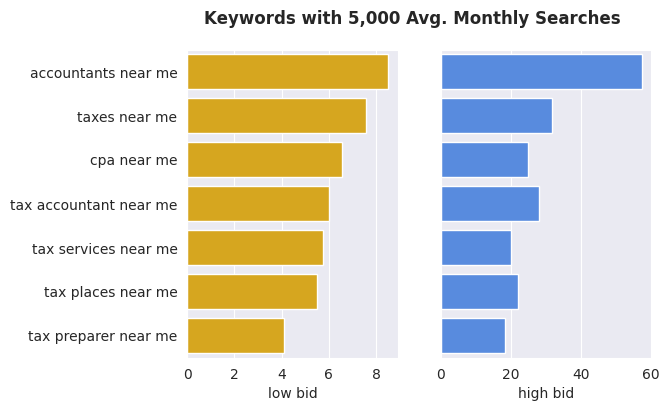

In [59]:
sns.set_style("darkgrid")

fig, axes = plt.subplots(1, 2, figsize=(6,4))

sns.barplot(x = 'low bid', y = 'Keyword', data = sorted_data, color='#F4B400', ax = axes[0])
sns.barplot(x = 'high bid', y = 'Keyword', data = sorted_data, color='#4285f4', ax = axes[1])
sns.despine

plt.suptitle ("Keywords with 5,000 Avg. Monthly Searches", fontsize=12, fontweight='bold')
axes[0].set_ylabel("")
axes[1].set_ylabel("")
axes[1].set(yticklabels=[])

##plt.savefig('near_me.png', dpi=300, format='png', bbox_inches='tight')
plt.show()

### **Ad Group 2**

In [60]:
# filter keywords by ams = 500

df2 = df.loc[df['ams'] == 500]

In [61]:
# sort the new dataframe
sorted = df2.sort_values(by='low bid', ascending=False)
sorted.head()

,Keyword,ams,Competition,low bid,high bid
66,tax specialists near me,500.0,Low,9.53,39.41
5,tax help near me,500.0,Medium,7.76,26.80
4,tax advisor near me,500.0,Low,7.35,27.70
21,tax experts near me,500.0,Low,7.21,26.81
15,tax filing near me,500.0,Low,7.01,29.00


In [62]:
# filter the dataframe further by low bid below $5
df3 = df2.loc[df2['low bid'] < 5]

In [63]:
# sort the data by high bid
sortdf3 = df3.sort_values(by='high bid', ascending=False)


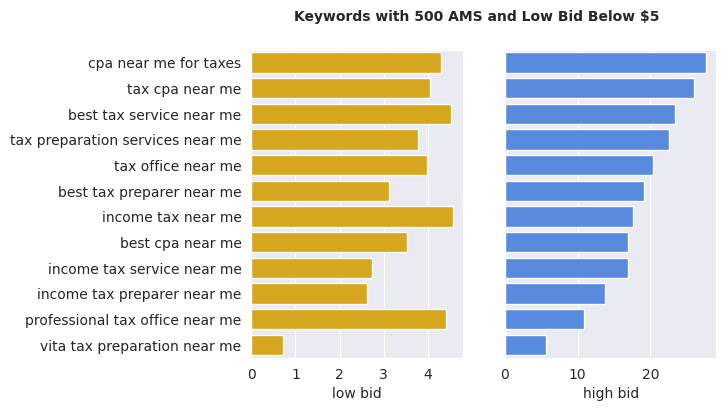

In [64]:
sns.set_style("darkgrid")

fig, axes = plt.subplots(1, 2, figsize=(6,4))

sns.barplot(x = 'low bid', y = 'Keyword', data = sortdf3, color='#F4B400', ax = axes[0])
sns.barplot(x = 'high bid', y = 'Keyword', data = sortdf3, color='#4285f4', ax = axes[1])
sns.despine

plt.suptitle ("Keywords with 500 AMS and Low Bid Below $5", fontsize=10, fontweight='bold')
axes[0].set_ylabel("")
axes[1].set_ylabel("")
axes[1].set(yticklabels=[])

plt.savefig('near_me2.png', dpi=300, format='png', bbox_inches='tight')
plt.show()